In [6]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
import os 
os.getcwd()

'/Users/HudsonCavanagh/GA_dsi-projects/weekly_work/week07'

In [7]:
iris = pd.read_csv('/Users/HudsonCavanagh/Documents/iris.csv')

In [8]:
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

## Step 1: Split the set into two sets

"X" will be the data and "Y" will be the class labels

In [9]:
type_dums = pd.get_dummies(iris['Name'])
iris = pd.merge(iris.drop('Name', axis=1), type_dums, left_index=True, right_index=True)
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth  Iris-setosa  \
0          5.1         3.5          1.4         0.2            1   
1          4.9         3.0          1.4         0.2            1   
2          4.7         3.2          1.3         0.2            1   
3          4.6         3.1          1.5         0.2            1   
4          5.0         3.6          1.4         0.2            1   

   Iris-versicolor  Iris-virginica  
0                0               0  
1                0               0  
2                0               0  
3                0               0  
4                0               0

In [11]:
X = iris.loc[:,["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]]
X.head()

SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2

In [17]:
from sklearn import preprocessing
X_scale = preprocessing.StandardScaler().fit_transform(X)
X_scale = pd.DataFrame(X_scale, columns=X.columns)
X_scale.head()

SepalLength  SepalWidth  PetalLength  PetalWidth
0    -0.900681    1.032057    -1.341272   -1.312977
1    -1.143017   -0.124958    -1.341272   -1.312977
2    -1.385353    0.337848    -1.398138   -1.312977
3    -1.506521    0.106445    -1.284407   -1.312977
4    -1.021849    1.263460    -1.341272   -1.312977

In [21]:
y = iris.iloc[:,4:]
y.head()

Iris-setosa  Iris-versicolor  Iris-virginica
0            1                0               0
1            1                0               0
2            1                0               0
3            1                0               0
4            1                0               0

## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data. 

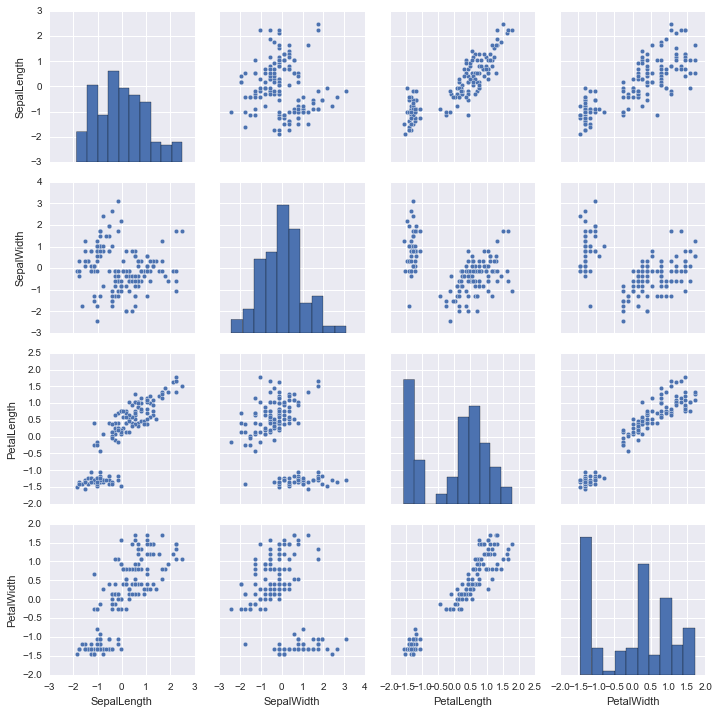

In [23]:
import seaborn as sns
%matplotlib inline

sns.pairplot(X_scale)

## Step 3: Dimensionality Reduction

First, standarize the data. While the Iris data attributes are all measured in the same units (cm), this is a worthwhile step for optimization and good practice for more unruly datasets!

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scale)

PCA(copy=True, n_components=2, whiten=False)

In [37]:

print("proportion of variance explained by PCA:", round(sum(pca.explained_variance_ratio_),2))

('proportion of variance explained by PCA:', 0.96)


In [30]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [-0.37231836, -0.92555649, -0.02109478, -0.06541577]])

Now, let's set up our data for decomposition by creating a covariance matrix

Now, decompose the the covariance matrix

In [39]:
cov_mat = np.cov(X_scale.T)
eigenValues, eigenVectors = np.linalg.eig(cov_mat)

Check the eigenvalues and eigenvectors

In [40]:
print(eigenValues, eigenVectors)

(array([ 2.93035378,  0.92740362,  0.14834223,  0.02074601]), array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))


In [41]:
eig_pairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eig_pairs.sort()
eig_pairs.reverse()
for i in eig_pairs[:2]:
    print(i[0],i[1])

(2.9303537755893179, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]))
(0.92740362151734157, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577]))


The eigenvectors with the lowest eigenvalues can be dropped

In [45]:
X_scale

SepalLength  SepalWidth  PetalLength  PetalWidth
0      -0.900681    1.032057    -1.341272   -1.312977
1      -1.143017   -0.124958    -1.341272   -1.312977
2      -1.385353    0.337848    -1.398138   -1.312977
3      -1.506521    0.106445    -1.284407   -1.312977
4      -1.021849    1.263460    -1.341272   -1.312977
5      -0.537178    1.957669    -1.170675   -1.050031
6      -1.506521    0.800654    -1.341272   -1.181504
7      -1.021849    0.800654    -1.284407   -1.312977
8      -1.748856   -0.356361    -1.341272   -1.312977
9      -1.143017    0.106445    -1.284407   -1.444450
10     -0.537178    1.494863    -1.284407   -1.312977
11     -1.264185    0.800654    -1.227541   -1.312977
12     -1.264185   -0.124958    -1.341272   -1.444450
13     -1.870024   -0.124958    -1.511870   -1.444450
14     -0.052506    2.189072    -1.455004   -1.312977
15     -0.173674    3.114684    -1.284407   -1.050031
16     -0.537178    1.957669    -1.398138   -1.050031
17     -0.900681    1.032057    -1.341272   -1.181504
18     -0.173674    1.726266    -1.170675   -1.181504
19     -0.900681    1.726266    -1.284407   -1.181504
20     -0.537178    0.800654    -1.170675   -1.312977
21     -0.900681    1.494863    -1.284407   -1.050031
22     -1.506521    1.263460    -1.568735   -1.312977
23     -0.900681    0.569251    -1.170675   -0.918558
24     -1.264185    0.800654    -1.056944   -1.312977
25     -1.021849   -0.124958    -1.227541   -1.312977
26     -1.021849    0.800654    -1.227541   -1.050031
27     -0.779513    1.032057    -1.284407   -1.312977
28     -0.779513    0.800654    -1.341272   -1.312977
29     -1.385353    0.337848    -1.227541   -1.312977
..           ...         ...          ...         ...
120     1.280340    0.337848     1.103953    1.447956
121    -0.294842   -0.587764     0.649027    1.053537
122     2.249683   -0.587764     1.672610    1.053537
123     0.553333   -0.819166     0.649027    0.790591
124     1.038005    0.569251     1.103953    1.185010
125     1.643844    0.337848     1.274550    0.790591
126     0.432165   -0.587764     0.592162    0.790591
127     0.310998   -0.124958     0.649027    0.790591
128     0.674501   -0.587764     1.047087    1.185010
129     1.643844   -0.124958     1.160819    0.527645
130     1.886180   -0.587764     1.331416    0.922064
131     2.492019    1.726266     1.502013    1.053537
132     0.674501   -0.587764     1.047087    1.316483
133     0.553333   -0.587764     0.762759    0.396172
134     0.310998   -1.050569     1.047087    0.264699
135     2.249683   -0.124958     1.331416    1.447956
136     0.553333    0.800654     1.047087    1.579429
137     0.674501    0.106445     0.990221    0.790591
138     0.189830   -0.124958     0.592162    0.790591
139     1.280340    0.106445     0.933356    1.185010
140     1.038005    0.106445     1.047087    1.579429
141     1.280340    0.106445     0.762759    1.447956
142    -0.052506   -0.819166     0.762759    0.922064
143     1.159173    0.337848     1.217684    1.447956
144     1.038005    0.569251     1.103953    1.710902
145     1.038005   -0.124958     0.819624    1.447956
146     0.553333   -1.281972     0.705893    0.922064
147     0.795669   -0.124958     0.819624    1.053537
148     0.432165    0.800654     0.933356    1.447956
149     0.068662   -0.124958     0.762759    0.790591

[150 rows x 4 columns]

In [44]:
#SepalLength	SepalWidth are more important features

W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1))) # Our transformation matrix, changed 11 to 4 
#because we have 4 features max in this dataset
X_reduced = X_scale.dot(W)
X_reduced

0         1
0   -2.264542 -0.505704
1   -2.086426  0.655405
2   -2.367950  0.318477
3   -2.304197  0.575368
4   -2.388777 -0.674767
5   -2.070537 -1.518549
6   -2.445711 -0.074563
7   -2.233842 -0.247614
8   -2.341958  1.095146
9   -2.188676  0.448629
10  -2.163487 -1.070596
11  -2.327378 -0.158587
12  -2.224083  0.709118
13  -2.639716  0.938282
14  -2.192292 -1.889979
15  -2.251465 -2.722371
16  -2.202750 -1.513750
17  -2.190179 -0.514304
18  -1.894074 -1.431111
19  -2.339949 -1.158033
20  -1.914556 -0.430465
21  -2.204645 -0.952457
22  -2.774170 -0.489517
23  -1.820412 -0.106751
24  -2.228217 -0.162186
25  -1.957024  0.607893
26  -2.052063 -0.266014
27  -2.168194 -0.552016
28  -2.140306 -0.336640
29  -2.268790  0.314879
..        ...       ...
120  2.040496 -0.907399
121  0.973915  0.571174
122  2.898064 -0.397791
123  1.329194  0.486761
124  1.704241 -1.014148
125  1.957728 -1.003335
126  1.171905  0.318897
127  1.019781 -0.065543
128  1.786009  0.193273
129  1.864778 -0.555382
130  2.435497 -0.246654
131  2.316082 -2.626184
132  1.860371  0.184672
133  1.111272  0.295986
134  1.197469  0.817168
135  2.800949 -0.844748
136  1.580155 -1.072474
137  1.347044 -0.422256
138  0.923433 -0.019230
139  1.853552 -0.672423
140  2.016157 -0.610397
141  1.903117 -0.686025
142  1.153190  0.701326
143  2.043308 -0.864685
144  2.001691 -1.048550
145  1.870522 -0.382822
146  1.558492  0.905314
147  1.520845 -0.266795
148  1.376391 -1.016362
149  0.959299  0.022284

[150 rows x 2 columns]

Calculate the explained variance

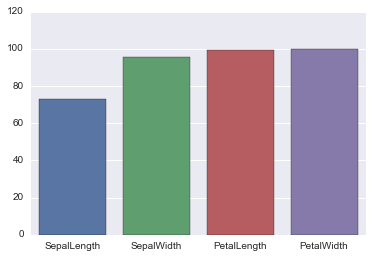

In [60]:
tot = sum(eigenValues)
var_exp = [(i / tot)*100 for i in sorted(eigenValues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
sns.barplot(X.columns, cum_var_exp)



What does the explained variance tell us?

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.33, random_state=1)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print clf.score(X_test, y_test, scoring='f1'), "mean accuracy, using {0} dimensions.".format(X_scale.shape[1])


TypeError: score() got an unexpected keyword argument 'scoring'

In [62]:

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_reduced, y, test_size=0.33, random_state=1)
clf_pca = RandomForestClassifier()
clf_pca.fit(X_train_pca, y_train_pca)
print clf_pca.score(X_test_pca, y_test_pca, scoring='f1'), "mean accuracy, using {0} principal component dimensions.".format(X_reduced.shape[1])

0.92 mean accuracy, using 2 principal component dimensions.
